`R`을 이용해서 간단한 생물정보학(bioinformatics) 분석을 해보도록 할게요. 여기서 우리가 초점을 맞출 것은 단백질의 서열입니다.  

생물학에 대한 기초적인 이해가 있다고 가정하고 `R`로 분석하는 것 위주로 설명을 할 겁니다. `R`을 사용하기 위해서는 일단 컴퓨터에 설치를 해야 할텐데요. 설치가 되어 있지 않다면 다음 [링크](https://a-little-book-of-r-for-bioinformatics.readthedocs.io/en/latest/src/installr.html)를 참고해서 설치하도록 하세요. 

# 생물정보학 위한 R packages: 

두 가지의 유명한 패키지가 알려져있습니다. 

- Bioconductor 
- SeqinR

각각의 특징을 간략하게 알아보자면 [Bioconductor](www.bioconductor.org)는 마이크로 어레이 데이터 같은 비교적 큰 데이터 분석을 위한 툴들을 제공합니다. 
반면에, [SeqinR](pbil.univ-lyon1.fr/software/seqinr/home.php?lang=eng)은 DNA나 단백질 서열을 분석하는데 중점을 두고 있습니다. 여기서는 **SeqinR**을 사용해볼 겁니다.

SeqinR을 사용하기 위해서는 먼저 설치부터 해야겠죠. 다음 명령어를 통해 설치를 하고, 실행을 해봅시다.

In [1]:
# package 설치하기
install.packages('seqinr')
# package 실행
library('seqinr')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## FASTA 형식(format)


FASTA 형식은 간단하고 많이 사용되는 형태의 파일입니다. sequence alignment용 FASTA라는 프로그램에서 처음으로 사용되었죠. 아래에 예시가 있습니다. 시퀀스에 대한 설명은 `>` 꺽쇄로 시작한 첫번째 줄에 적혀 있고, 다음 줄에는 서열 정보가 들어갑니다. 

    > A06852 183 residues
    MPRLFSYLLGVWLLLSQLPREIPGQSTNDFIKACGRELVRLWVEICGSVSWGRTALSLEE
    PQLETGPPAETMPSSITKDAEILKMMLEFVPNLPQELKATLSERQPSLRELQQSASKDSN
    LNFEEFKKIILNRQNEAEDKSLLELKNLGLDKHSRKKRLFRMTLSEKCCQVGCIRKDIAR


# 서열 정보를 R로 읽어오기 

`SeqinR` 패키지를 사용해서 파스타(FASTA) 파일을 읽어 보도록 해보겠습니다. 

![](https://a-little-book-of-r-for-bioinformatics.readthedocs.io/en/latest/_images/P1_image3.png)

NCBI에 **NC_001477**로 accession 되어 있는 **DEN-1 Dengue virus genome sequence**의 파스타 파일을 다운받아 주세요. 파일명은 **DEN-1.fasta**로 하겠습니다.

> `getncbiseq()`을 이용해 한번에 불러오는 방법도 있어요. 

다운받은 파스타 파일이 있는 폴더에서 아래의 명령어를 입력합니다.

In [2]:
library("seqinr")

dengue <- read.fasta(file = "den1.fasta")
# In fact, the first element of the list object dengue contains the the DNA sequence
dengueseq <- dengue[[1]]

# DNA 서열의 길이

DNA 서열을 불러온 다음에는 제대로 불어왔는지를 확인하기 위해 총 서열의 길이를 알아 보도록 하겠습니다. 

In [3]:
length(dengueseq)

[1] 10735

총 **10735**개의 DNA 서열로 구성되어있다는 것을 알 수 있군요.

## 원하는 부분의 서열만 얻기

DNA 서열에서도 특정 부분만 필요할 때가 있습니다. **DEN-1 Dengue virus genome sequence**의 처음부터 50번째 까지의 서열을 확인해보겠습니다.

In [4]:
print(dengueseq[1:50])

 [1] "a" "g" "t" "t" "g" "t" "t" "a" "g" "t" "c" "t" "a" "c" "g" "t" "g" "g" "a"
[20] "c" "c" "g" "a" "c" "a" "a" "g" "a" "a" "c" "a" "g" "t" "t" "t" "c" "g" "a"
[39] "a" "t" "c" "g" "g" "a" "a" "g" "c" "t" "t" "g"


# DNA 서열상의 염기 구성

DNA는 4가지의 nucleotides (“A”, “C”, “G”, “T”) 로 구성되어 있습니다. **DEN-1.fasta**에 각각이 몇개나 있는지 알아 보도록 하죠. 

In [5]:
table(dengueseq)

dengueseq
   a    c    g    t 
3426 2240 2770 2299 

**DEN-1 Dengue virus genome sequence**에는 3426개의 A, 2240개의 C, 2770개의 G and 그리고 2299개의 T로 구성되어 있군요.

# GC Content of DNA

genome sequene에서 가장 기초적인 분석은 GC content 입니다. DNA 서열상에 G와 C의 비율이 얼마나 되는지를 표현하죠. `SeqinR`에서는 `GC()` 기능을 제공하기 때문에 손쉽게 알아 볼 수 있습니다.

In [6]:
GC(dengueseq)

[1] 0.4666977

GC content는 총 46.66977%입니다. 약간 적은 편이네요.
 

# 특정 부분의 GC content
좀전의 분석은 전체 서열상에서 평균 GC content이었습니다. 하지만 DNA서열상의 특정부분에서의 GC content는 어떻게 알 수 있을까요?

전체서열을 여러개의 조각으로 나누어 `GC()`기능을 사용해보겠습니다.
예시로 여기서는 300개씩 잘라보았습니다.

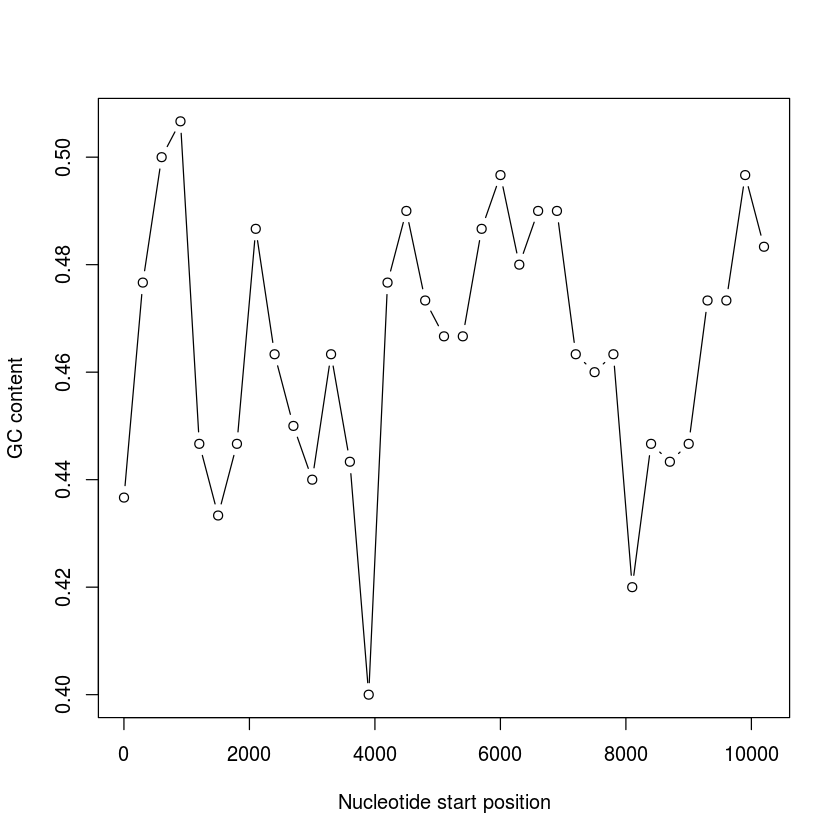

In [7]:
slidingwindowplot <- function(windowsize, inputseq)
{
   starts <- seq(1, length(inputseq)-windowsize, by = windowsize)
   n <- length(starts)    # Find the length of the vector "starts"
   chunkGCs <- numeric(n) # Make a vector of the same length as vector "starts", but just containing zeroes
   for (i in 1:n) {
        chunk <- inputseq[starts[i]:(starts[i]+windowsize-1)]
        chunkGC <- GC(chunk)
        # print(chunkGC)
        chunkGCs[i] <- chunkGC
   }
   plot(starts,chunkGCs,type="b",xlab="Nucleotide start position",ylab="GC content")
}

# 300개씩 서열을 나누어서 GC() 기능을 사용합니다.
slidingwindowplot(300, dengueseq)

전체적인 서열상에서 GC contents가 특별하게 낮은 구역은 4000번(40%) 즈음이군요. 

## 파스타(FASTA) 파일 쓰기

파스타 파일을 불러들여 간단히 분석을 해보았는데, 이제는 편집한 서열을 파스타 파일로 저장하는 방법을 알아보겠습니다. 

아래와 같이 작성해주면, **den1.fasta**라는 파일이 폴더에 생긴것을 확인 할수 있어요.

In [8]:
write.fasta(names="DEN-1", sequences=dengueseq, file.out="den1.fasta")

# 파스타 파일에서 단백질 서열을 불러오기

`SeqinR`을 사용하면 DNA 서열과 동일한 방법으로 단백질 서열도 읽을수 있습니다. **Uniprot** 에 각각 **Q9CD83** , **A0PQ23**으로 저장되어 있는 단백질 서열의 파스타 파일을 다운받으세요.

##  예시로 사용한 Q9CD83, A0PQ23 ?
**Q9CD83** 과 **A0PQ23** 는 Chorismate pyruvate-lyase라는 효소입니다. 차이점은 서로 다른 균주에서 발현된다는 것입니다. 

- Q9CD83은 *Mycobacterium leprae* 
- A0PQ23은 *Mycobacterium ulcerans*

R에서 아래와 같이 입력하세요.

In [9]:
leprae <- read.fasta(file = "Q9CD83.fasta")
lepraeseq <- leprae[[1]]

ulcerans <- read.fasta(file = "A0PQ23.fasta")
ulceransseq <- ulcerans[[1]]

lepraeseq # Display the contents of "lepraeseq"

  [1] "m" "t" "n" "r" "t" "l" "s" "r" "e" "e" "i" "r" "k" "l" "d" "r" "d" "l"
 [19] "r" "i" "l" "v" "a" "t" "n" "g" "t" "l" "t" "r" "v" "l" "n" "v" "v" "a"
 [37] "n" "e" "e" "i" "v" "v" "d" "i" "i" "n" "q" "q" "l" "l" "d" "v" "a" "p"
 [55] "k" "i" "p" "e" "l" "e" "n" "l" "k" "i" "g" "r" "i" "l" "q" "r" "d" "i"
 [73] "l" "l" "k" "g" "q" "k" "s" "g" "i" "l" "f" "v" "a" "a" "e" "s" "l" "i"
 [91] "v" "i" "d" "l" "l" "p" "t" "a" "i" "t" "t" "y" "l" "t" "k" "t" "h" "h"
[109] "p" "i" "g" "e" "i" "m" "a" "a" "s" "r" "i" "e" "t" "y" "k" "e" "d" "a"
[127] "q" "v" "w" "i" "g" "d" "l" "p" "c" "w" "l" "a" "d" "y" "g" "y" "w" "d"
[145] "l" "p" "k" "r" "a" "v" "g" "r" "r" "y" "r" "i" "i" "a" "g" "g" "q" "p"
[163] "v" "i" "i" "t" "t" "e" "y" "f" "l" "r" "s" "v" "f" "q" "d" "t" "p" "r"
[181] "e" "e" "l" "d" "r" "c" "q" "y" "s" "n" "d" "i" "d" "t" "r" "s" "g" "d"
[199] "r" "f" "v" "l" "h" "g" "r" "v" "f" "k" "n" "l"
attr(,"name")
[1] "sp|Q9CD83|PHBS_MYCLE"
attr(,"Annot")
[1] ">sp|Q9CD83|PHBS_MYCLE Chori

파스타 파일이 아미노산 서열을 담고 있는것을 확인할 수 있고, 서열으 정보(균주, 이름)등을 알수 있군요.


# 두 서열을 점도표로 비교하기 

두가지의 서열을 비교할때는 먼저 점도표(dotplot)을 그려보는것은 언제나 좋은 생각입니다. 

`dotPlot()`이라는 기능으로 쉽게 그려 볼 수 있죠. 위에서 예로 들었던 *Mycobacterium leprae* 과 *Mycobacterium ulcerans*의 Chorismate pyruvate-lyase를 비교해보도록 하죠.

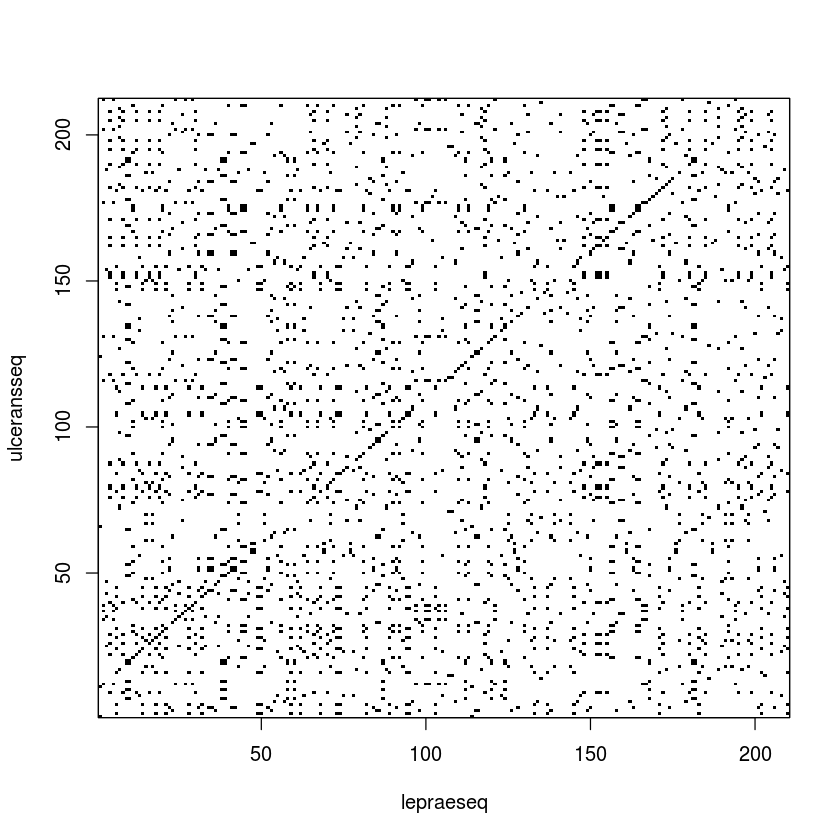

In [10]:
dotPlot(lepraeseq, ulceransseq)

위의 점도표에서, *M. leprae*의 서열은 x축에, *M. ulcerans*의 서열은 y축으로 표현되어 있습니다. 두개의 서열이 동일하면 점으로 표시됩니다. 예를 들어 x축의 아미노산 50번과 y축의 53번째 아미노산이 동일하기때문에 점이 찍혀 있습니다. 

두개의 서열이 유사할수록 대각선이 선명하게 나타납니다. 우리가 사용한 단백질 서열은 서로 유사한 효소(homologues)이기 때문에 예상한것 처럼 선명한 대각선을 볼 수 있죠.

# 코돈표

`SeqinR` 패키지에는 `tablecode()` 라는 기능으로 표준 코돈표를 제공하고 있습니다. 아래와 같이 확인할 수 있죠.

보통 인터넷에서 쉽게 확인 할 수 있는것이라 큰 쓸모는 없을 수도 있겠습니다.

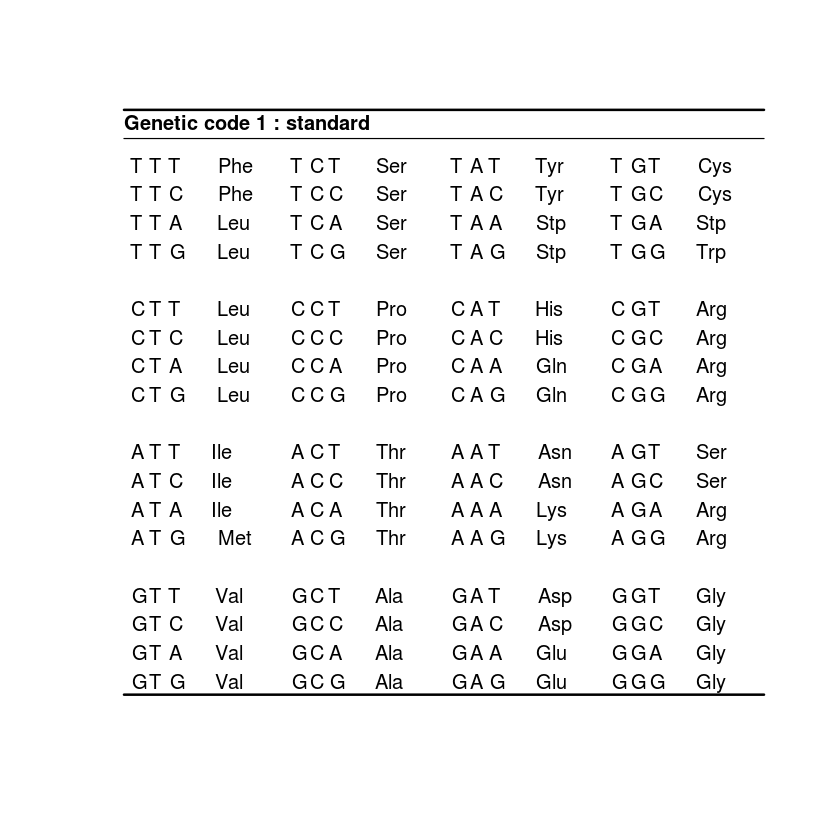

In [11]:
tablecode()

# 마치며
 
`R`의 `SeqinR`이라는 패키지를 사용해 생물학적 서열정보를 간략하게 분석해보았습니다. `R`에서 기본적으로 제공하는 다음의 기능과

- 벡터(vector)나 리스트(list)의 길이를 알 수 있는 `length()`
- 벡터(vector)나 리스트(list)의 구성성분의 갯수를 알려주는 `table()` 

`SeqinR` 패키지에서 제공하는 기능

- DNA 서열의 GC content를 계산해주는 `GC()`

를 기억해주세요.

# Source
 - https://a-little-book-of-r-for-bioinformatics.readthedocs.io